In [1]:
import json
import pandas as pd
from pathlib import Path 
import plot_utils
import matplotlib.pyplot as plt


from importlib import reload
reload(plot_utils)

plot_utils.set_style()

ftype = '.pdf'


## Garibsingh Case Study (#1)

In [2]:
save_dir = Path('figs_garibsingh')
save_dir.mkdir(exist_ok=True)

In [3]:
def scatter_plot_2d(x, y, z, xlabel='', ylabel='', zlabel='', c=0):
    maps = [plt.cm.get_cmap('PRGn_r'), plt.cm.get_cmap('coolwarm'), plt.cm.get_cmap('PiYG')]
    # plt.cm.get_cmap('RdYlBu')
    fig, ax = plt.subplots(1,1)
    cm = maps[c]
    sc = plt.scatter(x, y, c=z, s=35, cmap=cm, edgecolor='k', linewidth=0.5)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plot_utils.set_size(1.5, 1.2, ax=ax)
    cbar = plt.colorbar(sc)
    cbar.set_label(zlabel)
    return ax, fig

#### Vary $\lambda_1$

In [4]:
result_dir = Path('../results/garibsingh_rew_vary')
df = plot_utils.df_from_dir(result_dir)
df

,Number targets,Fraction targets,Total reward,Possible reward,Number starting materials,Cost starting materials,Number reaction steps,Average reaction score,Reward Weight,Starting Material Weight,Reaction Weight
0,0,0.000000,0.000000,6.247765,0,0.0,0,NaN,2.0,1.0,1.0
1,1,0.071429,1.000000,6.247765,2,1.3,3,0.893510,5.0,1.0,1.0
2,13,0.928571,6.247765,6.247765,22,24.3,47,0.842310,80.0,1.0,1.0
3,3,0.214286,2.239944,6.247765,5,3.8,8,0.913835,8.0,1.0,1.0
4,5,0.357143,3.315363,6.247765,8,9.3,16,0.963189,12.5,1.0,1.0
5,7,0.500000,4.257263,6.247765,12,12.7,24,0.953867,15.0,1.0,1.0
6,8,0.571429,4.736872,6.247765,14,13.9,29,0.934677,20.0,1.0,1.0
7,9,0.642857,5.031006,6.247765,16,19.1,31,0.932145,30.0,1.0,1.0
8,11,0.785714,5.612849,6.247765,19,21.4,39,0.870510,50.0,1.0,1.0
9,12,0.857143,6.173743,6.247765,21,23.5,45,0.851221,60.0,1.0,1.0


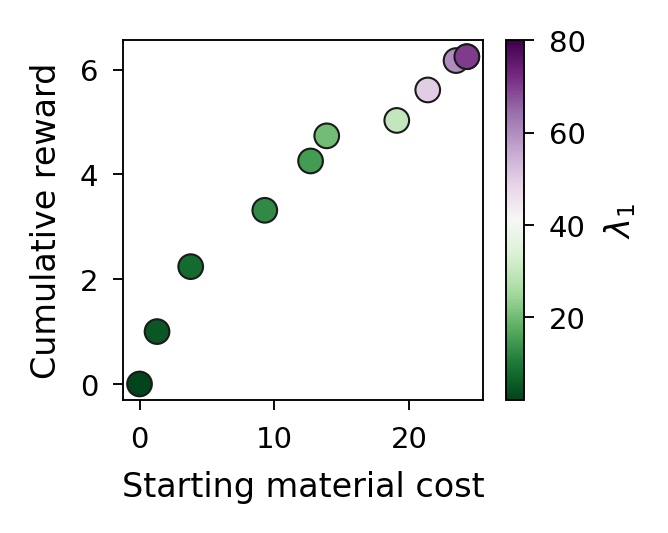

In [5]:
ax, fig = scatter_plot_2d(
    x=df['Cost starting materials'], 
    y=df['Total reward'], 
    z=df['Reward Weight'],
    xlabel='Starting material cost',
    ylabel='Cumulative reward',
    zlabel='$\\lambda_1$', 
    c=0
)
fig.savefig(save_dir/f'lam1_cost_rew{ftype}',bbox_inches='tight', dpi=200, transparent=True)

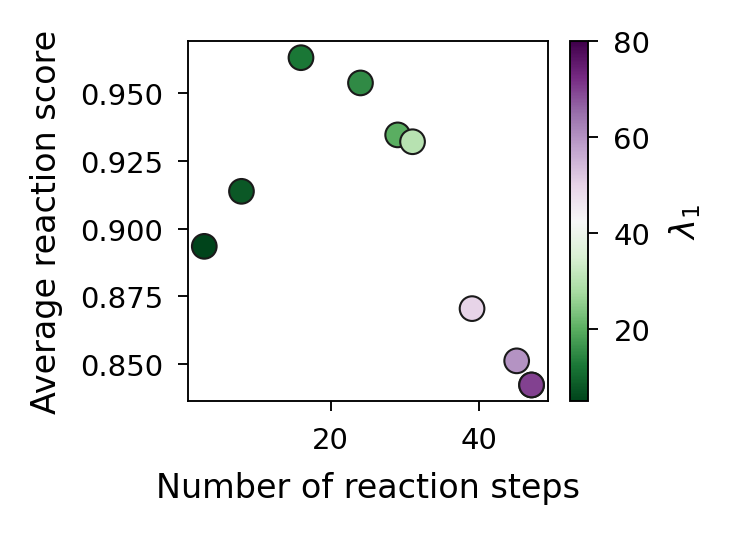

In [6]:
ax, fig = scatter_plot_2d(
    x=df['Number reaction steps'], 
    y=df['Average reaction score'], 
    z=df['Reward Weight'],
    xlabel='Number of reaction steps',
    ylabel='Average reaction score',
    zlabel='$\\lambda_1$',
    c=0,
)
fig.savefig(save_dir/f'lam1_nsteps_rxnscore{ftype}',bbox_inches='tight', dpi=200, transparent=True)

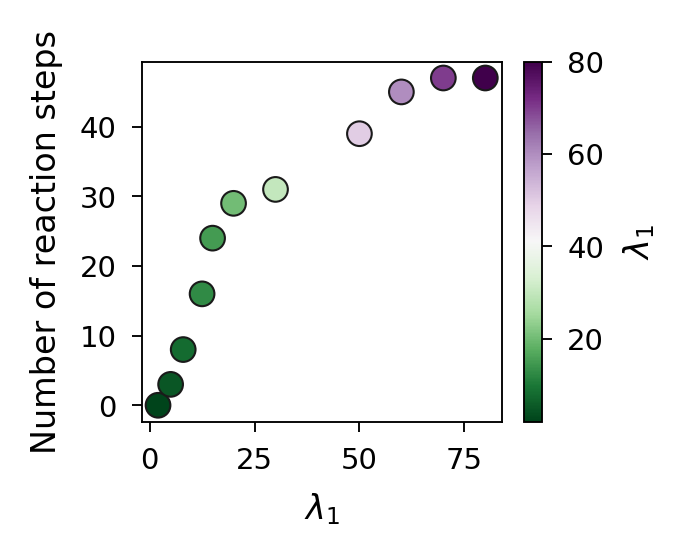

In [7]:
ax, fig = scatter_plot_2d(
    x=df['Reward Weight'], 
    y=df['Number reaction steps'], 
    z=df['Reward Weight'],
    xlabel='$\\lambda_1$',
    ylabel='Number of reaction steps',
    zlabel='$\\lambda_1$',
    c=0
)
fig.savefig(save_dir/f'lam1_nsteps{ftype}',bbox_inches='tight', dpi=200, transparent=True)

#### Vary $\lambda_2$

In [8]:
result_dir = Path('../results/garibsingh_cost_vary')
df = plot_utils.df_from_dir(result_dir)
df

,Number targets,Fraction targets,Total reward,Possible reward,Number starting materials,Cost starting materials,Number reaction steps,Average reaction score,Reward Weight,Starting Material Weight,Reaction Weight
0,10,0.714286,5.220391,6.247765,17,22.9,34,0.937469,20.0,0.20,1.0
1,9,0.642857,5.031006,6.247765,16,19.1,31,0.932145,20.0,0.35,1.0
2,0,0.000000,0.000000,6.247765,0,0.0,0,NaN,20.0,15.00,1.0
3,8,0.571429,4.736872,6.247765,14,13.9,29,0.934677,20.0,0.70,1.0
4,7,0.500000,4.257263,6.247765,12,12.7,24,0.953867,20.0,1.30,1.0
5,7,0.500000,4.257263,6.247765,12,12.7,24,0.953867,20.0,2.00,1.0
6,6,0.428571,3.605028,6.247765,9,9.1,19,0.921017,20.0,2.50,1.0
7,5,0.357143,3.181844,6.247765,8,7.1,16,0.925123,20.0,3.00,1.0
8,3,0.214286,2.239944,6.247765,5,3.8,8,0.913835,20.0,3.50,1.0
9,2,0.142857,1.638268,6.247765,3,1.9,6,0.905295,20.0,6.00,1.0


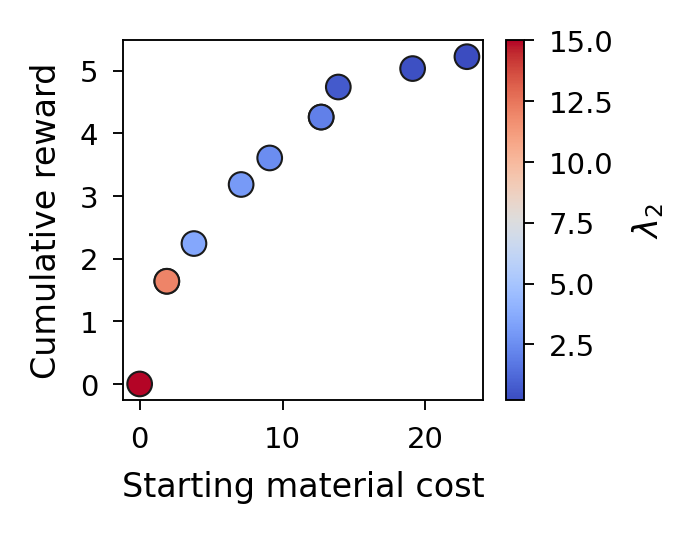

In [9]:
from matplotlib.ticker import MaxNLocator

ax, fig = scatter_plot_2d(
    x=df['Cost starting materials'], 
    y=df['Total reward'], 
    z=df['Starting Material Weight'],
    xlabel='Starting material cost',
    ylabel='Cumulative reward',
    zlabel='$\\lambda_2$',
    c=1
)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.savefig(save_dir/f'lam2_cost_rew{ftype}',bbox_inches='tight', dpi=200, transparent=True)

#### Vary $\lambda_3$

In [10]:
result_dir = Path('../results/garibsingh_rxn_vary')
df = plot_utils.df_from_dir(result_dir)
df

,Number targets,Fraction targets,Total reward,Possible reward,Number starting materials,Cost starting materials,Number reaction steps,Average reaction score,Reward Weight,Starting Material Weight,Reaction Weight
0,13,0.928571,6.247765,6.247765,18,18.7,48,0.786410,20.0,1.0,0.10
1,12,0.857143,6.173743,6.247765,20,21.3,48,0.847459,20.0,1.0,0.25
2,1,0.071429,1.000000,6.247765,2,1.3,3,0.893510,20.0,1.0,5.00
3,11,0.785714,5.612849,6.247765,18,19.2,42,0.864834,20.0,1.0,0.35
4,9,0.642857,4.926257,6.247765,15,14.4,33,0.922416,20.0,1.0,0.50
5,8,0.571429,4.736872,6.247765,14,13.9,29,0.934677,20.0,1.0,1.00
6,7,0.500000,4.257263,6.247765,12,12.7,24,0.953867,20.0,1.0,1.50
7,7,0.500000,4.257263,6.247765,12,12.7,24,0.953867,20.0,1.0,1.70
8,5,0.357143,3.315363,6.247765,8,9.3,16,0.963189,20.0,1.0,2.00
9,3,0.214286,2.239944,6.247765,5,3.8,8,0.913835,20.0,1.0,3.00


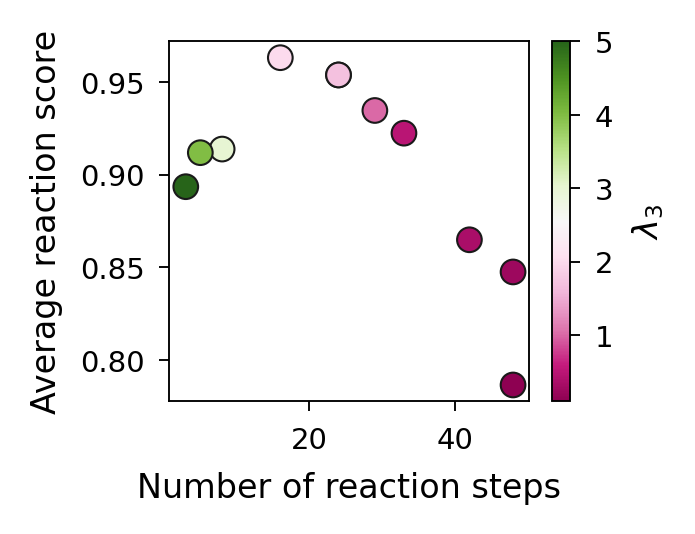

In [11]:
ax, fig = scatter_plot_2d(
    x=df['Number reaction steps'], 
    y=df['Average reaction score'], 
    z=df['Reaction Weight'],
    xlabel='Number of reaction steps',
    ylabel='Average reaction score',
    zlabel='$\\lambda_3$',
    c=2
)
fig.savefig(save_dir/f'lam3_nsteps_score{ftype}',bbox_inches='tight', dpi=200, transparent=True)

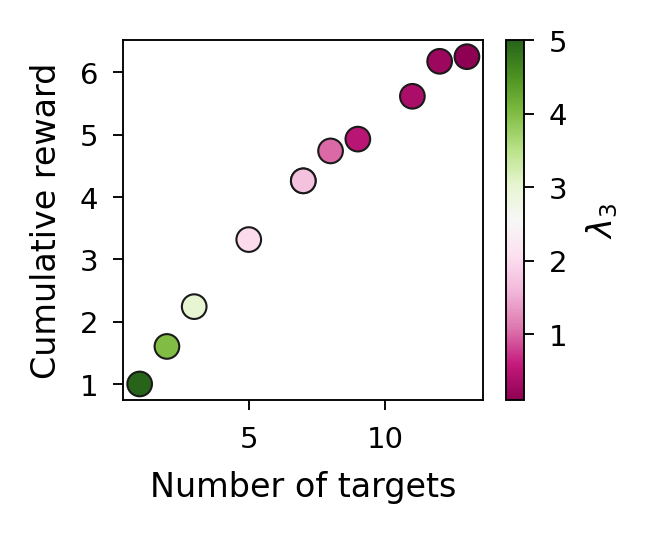

In [12]:
ax, fig = scatter_plot_2d(
    x=df['Number targets'], 
    y=df['Total reward'], 
    z=df['Reaction Weight'],
    xlabel='Number of targets',
    ylabel='Cumulative reward',
    zlabel='$\\lambda_3$',
    c=2
)
fig.savefig(save_dir/f'lam3_ntar_rew{ftype}',bbox_inches='tight', dpi=200, transparent=True)

## AMD Case Study (#2)

In [13]:
save_dir = Path('figs_amd')
save_dir.mkdir(exist_ok=True)

In [14]:
def double_line_plot(x, y1, y2, label1=None, label2=None, color1='blue', color2='red', xlabel='time (s)', size=[1.5,1.5]):
    fig, ax1 = plt.subplots()

    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(label1, color=color1)
    line1, = ax1.plot(x, y1, color=color1)  # Removed marker
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.grid(linewidth=0.5)

    ax2 = ax1.twinx()  
    ax2.set_ylabel(label2, color=color2)  
    line2, = ax2.plot(x, y2, color=color2)  # Removed marker
    ax2.tick_params(axis='y', labelcolor=color2)

    fig.tight_layout() 
    plot_utils.set_size(size[0], size[1], ax=ax1) 
    plot_utils.set_size(size[0], size[1],ax=ax2)
    
    # Added legend
    return fig

In [15]:
df = plot_utils.df_from_dir(Path('../results/amd'))
df = df.sort_values('Reward Weight')
df.head()

,Number targets,Fraction targets,Total reward,Possible reward,Number starting materials,Cost starting materials,Number reaction steps,Average reaction score,Reward Weight,Starting Material Weight,Reaction Weight
0,0,0.000000,0.000000,90.769231,1,0.0,0,NaN,1.0,1.0,1.0
11,4,0.033058,2.384615,90.769231,5,3.7,0,NaN,2.0,1.0,1.0
13,15,0.123967,9.846154,90.769231,13,13.1,10,0.975691,3.0,1.0,1.0
14,31,0.256198,21.230769,90.769231,24,35.7,25,0.944177,4.0,1.0,1.0
15,34,0.280992,24.000000,90.769231,28,43.6,30,0.953073,5.0,1.0,1.0


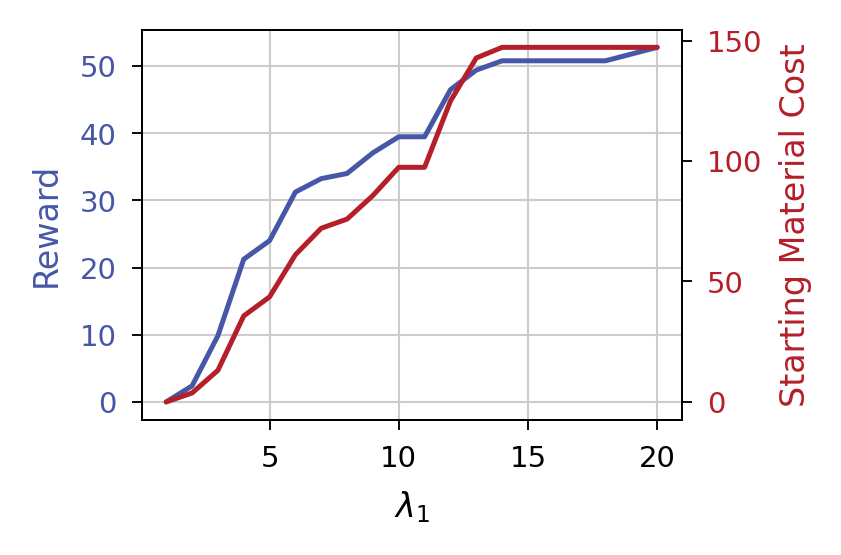

In [16]:
fig = double_line_plot(df['Reward Weight'], df['Total reward'], df['Cost starting materials'], 
                 label1='Reward', label2='Starting Material Cost', xlabel='$\\lambda_1$',
                 color1='#4757A7', color2='#B41F29', size=[1.8, 1.3])
fig.savefig(save_dir/f'reward_cost{ftype}',bbox_inches='tight', dpi=200, transparent=True)

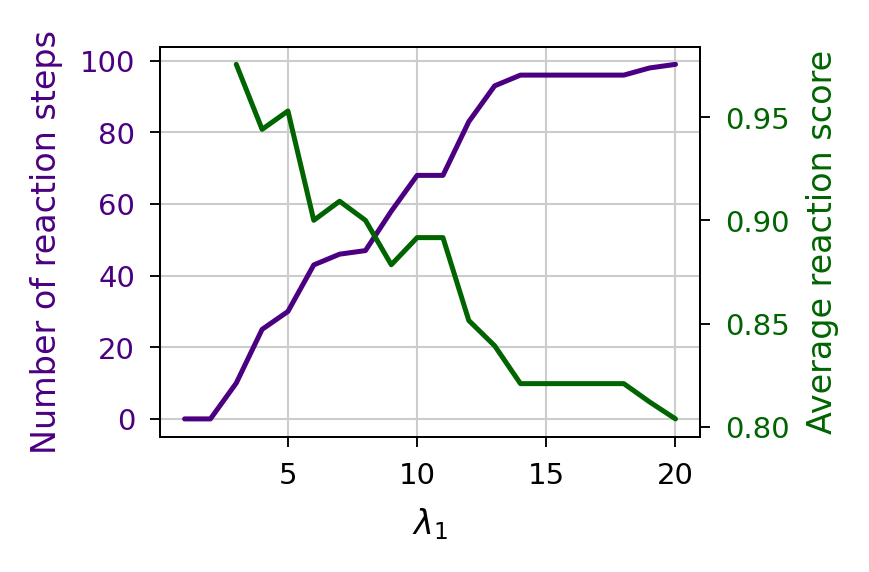

In [17]:
fig = double_line_plot(df['Reward Weight'], df['Number reaction steps'], df['Average reaction score'], 
                 label1='Number of reaction steps', label2='Average reaction score', xlabel='$\\lambda_1$',
                 color1='indigo', color2='darkgreen', size=[1.8,1.3])
fig.savefig(save_dir/f'reactions{ftype}',bbox_inches='tight', dpi=200, transparent=True)

100%|██████████| 15246/15246 [00:00<00:00, 27751.77it/s]


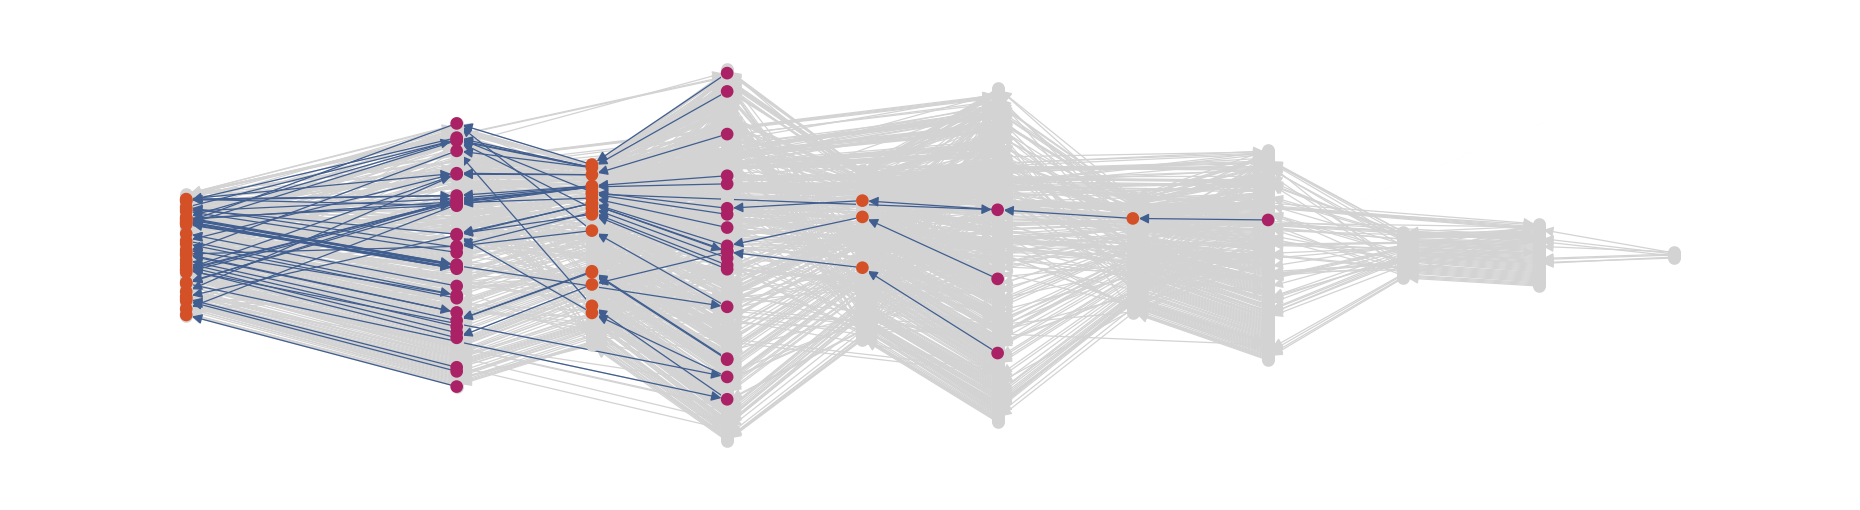

In [18]:
reload(plot_utils)
vis_results = Path('../results/amd/lam_5.0_1_1')
fig, ax = plot_utils.graph_vis(
    tree_path=Path('../examples/amd/trees_w_info.json'),
    routes_path=Path(vis_results/'routes.json'),
    cleaned_tar_path=Path(vis_results/'cleaned_tar_dict.csv'),
    percent_plot=1
    )
plot_utils.set_size(6, 1.5, ax=ax)
fig.savefig(save_dir/f'network{ftype}',bbox_inches='tight', dpi=1000, transparent=True)

## Button Case Study

In [19]:
df = plot_utils.df_from_dir(Path('../results/button_alectinib'))
df


,Number targets,Fraction targets,Total reward,Possible reward,Number starting materials,Cost starting materials,Number reaction steps,Average reaction score,Reward Weight,Starting Material Weight,Reaction Weight
0,19,0.088372,8.304348,96.695652,31,140.1,24,0.965082,10.0,0.1,2.0
1,6,0.027907,2.695652,96.695652,9,105.4,3,0.955923,10.0,0.1,3.0
2,6,0.027907,2.956522,96.695652,11,12.5,12,0.975938,10.0,1.0,1.0
3,17,0.079070,6.347826,96.695652,30,32.3,33,0.946098,15.0,1.0,1.0
4,0,0.000000,0.000000,96.695652,0,0.0,0,NaN,15.0,1.0,10.0
5,7,0.032558,3.434783,96.695652,13,15.5,14,0.974972,15.0,1.0,2.0
6,0,0.000000,0.000000,96.695652,0,0.0,0,NaN,15.0,1.0,5.0
7,74,0.344186,24.521739,96.695652,2886,386222.9,0,NaN,1.0,0.0,1.0
8,22,0.102326,8.478261,96.695652,38,63.4,39,0.941339,20.0,1.0,1.0
9,36,0.167442,13.826087,96.695652,61,144.8,75,0.906571,30.0,1.0,1.0
